In [1]:
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt
import twirl

%config IPCompleter.use_jedi = False

In [2]:
# opening the image and defining inputs
hdu = fits.open("...")[0]

header = hdu.header 
data = hdu.data

# ra, dec in degrees
ra, dec = header["RA"], header["DEC"]
target = SkyCoord(ra, dec, unit="deg")

# image shape and pixel size in "
shape = data.shape
pixel = 0.66

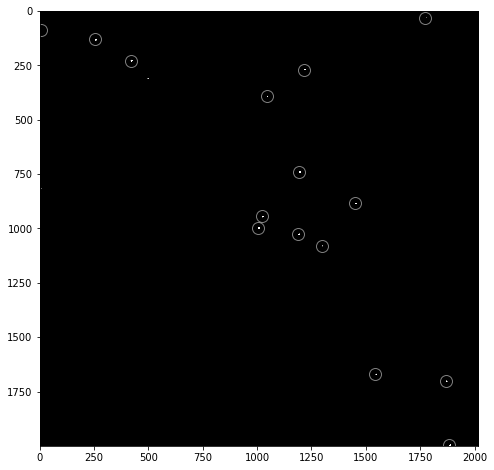

In [29]:
# Let's find some stars and display the image

stars = twirl.find_peaks(data)[0:15]

plt.figure(figsize=(8,8))
plt.imshow(data, cmap="Greys_r", vmax=800, vmin=500)
plt.plot(*stars.T, "o", fillstyle="none", c="w", alpha=0.5, ms=12)

In [22]:
# catalog query
radec = twirl.gaia_radec(target, shape, pixel)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
INFO: Query finished. [astroquery.utils.tap.core]


In [24]:
# The wcs matching
wcs, aligned = twirl.match_wcs(stars, radec, return_aligned=True)

# show wcs
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 43.573750386307125  -41.466415750164835  
CRPIX : 1439.0920875077506  876.4260136242525  
CD1_1 CD1_2  : -3.946145367716574  -0.18096787133401498  
CD2_1 CD2_2  : 8.699526137648338  1.3294055924188497  
NAXIS : 861.1548060621806  1671.3257175814354

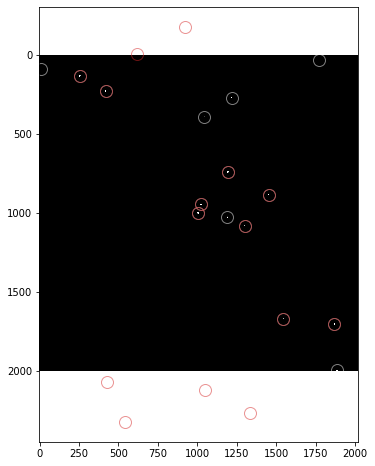

In [28]:
# To visualize the match
plt.figure(figsize=(8,8))
plt.imshow(data, cmap="Greys_r", vmax=800, vmin=500)
plt.plot(*stars.T, "o", fillstyle="none", c="w", alpha=0.5, ms=12)
plt.plot(*aligned.T, "o", fillstyle="none", c="C3", alpha=0.5, ms=12)